# Chapter X: Running deterministic and stochastic simulations with Tellurium and libRoadRunner 

<br>
<div align='center'>
    <figure>
    <img src="https://raw.githubusercontent.com/vporubsky/tellurium-libroadrunner-tutorial/master/tellurium-utilities.png" width="75%" style="padding: 20px">
        <figcaption>Tellurium is an integrated modeling environment which makes available libraries to support biochemical model building and simulation. Reproduced from [cite Tellurium paper/docs].</figcaption>
    </figure>
</div>

## How does numerical simulation help us model network kinetics?

<ul>
  <li>Provides a method to approximate analytical solutions for complex (often non-linear) systems</li>
  <li>Kinetic laws describe the rates of change of species in the system, which can be modeled mathematically</li>
  <li>For a sufficiently large network, simulators must be efficient and perform rapid numerical integration</li>
</ul>

## How is numerical integration performed?

<ul>
  <li>Requires differential equations describing the model, constant values, and initial conditions for all variables which are evolving in time</li>
  <li>Numerical integration algorithms assume local linearity, and use tangent lines over small step sizes to gradually approximate the solution, starting from some initial value</li>
  <li>Euler's method can be examined as a simple example</li>
</ul>

In [1]:
# First, install Tellurium, which comes with libRoadRunner 
!pip install tellurium

You should consider upgrading via the 'C:\Tellurium-Winpython-3.7\python-3.7.7.amd64\python.exe -m pip install --upgrade pip' command.


In [2]:
import tellurium as te # Python-based modeling environment for kinetic models
import roadrunner as rr # High-performance simulation and analysis library
import numpy as np # Scientific computing package
import random # Generate random numbers 
import matplotlib.pylab as plt # Additional Python plotting utilities

## Simulating the simple Antimony model

In [3]:
Ant_str = """
model test               # name the model
    compartment C1;      # specify compartments
    C1 = 1.0;            # assign compartment volume
    species S1, S2;      # specify species
    S1 in C1; S2 in C1;  # allocate species to appropriate compartment

 
    J1: S1 -> S2; k1*S1; # reaction; reaction rate law;
    
    S1 = 10.0;           # assign species initial conditions
    S2 = 0.0;

    k1 = 1.0;            # assign constant values to global parameters
end
"""

r = te.loada(Ant_str)  # create an executable model by loading the string to a RoadRunner object instance
result = r.simulate(0, 10, 25) # simulate(time_start, time_end, number_of_points)
print(result)

        time,        [S1],    [S2]
 [[        0,          10,       0],
  [ 0.416667,      6.5924,  3.4076],
  [ 0.833333,     4.34599, 5.65401],
  [     1.25,     2.86506, 7.13494],
  [  1.66667,     1.88877, 8.11123],
  [  2.08333,     1.24516, 8.75484],
  [      2.5,    0.820861, 9.17914],
  [  2.91667,    0.541147, 9.45885],
  [  3.33333,    0.356747, 9.64325],
  [     3.75,    0.235183, 9.76482],
  [  4.16667,    0.155042, 9.84496],
  [  4.58333,    0.102211, 9.89779],
  [        5,   0.0673815, 9.93262],
  [  5.41667,   0.0444208, 9.95558],
  [  5.83333,   0.0292841, 9.97072],
  [     6.25,   0.0193053, 9.98069],
  [  6.66667,   0.0127269, 9.98727],
  [  7.08333,   0.0083901, 9.99161],
  [      7.5,  0.00553111, 9.99447],
  [  7.91667,  0.00364634, 9.99635],
  [  8.33333,  0.00240382,  9.9976],
  [     8.75,   0.0015847, 9.99842],
  [  9.16667,   0.0010447, 9.99896],
  [  9.58333, 0.000688713, 9.99931],
  [       10, 0.000454029, 9.99955]]



## Plotting the simple Antimony model

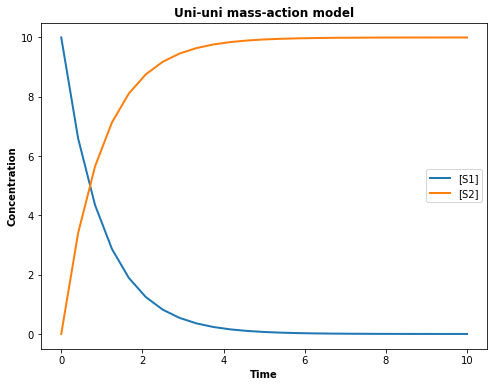

In [4]:
r.plot(title = 'Uni-uni mass-action model', xtitle = 'Time', ytitle = 'Concentration', figsize = (8, 6)) 

## Writing a simulation with events

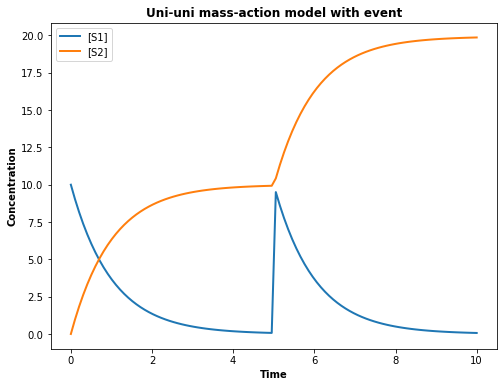

In [5]:
Ant_str = """
model test               # name the model
    J1: S1 -> S2; k1*S1; # reaction; reaction rate law;
    
    S1 = 10.0;           # assign species initial conditions
    S2 = 0.0;

    k1 = 1.0;            # assign constant values to global parameters
    E1: at (time > 5): S1 = 10; # add an event - spike in S1
end
"""
r = te.loada(Ant_str)  # create an executable model by loading the string to a RoadRunner object instance
r.simulate(0, 10, 100) # simulate(time_start, time_end, number_of_points)
r.plot(title = 'Uni-uni mass-action model with event', xtitle = 'Time', ytitle = 'Concentration', figsize = (8, 6)) 



## Simulating a complex model with interesting dynamics

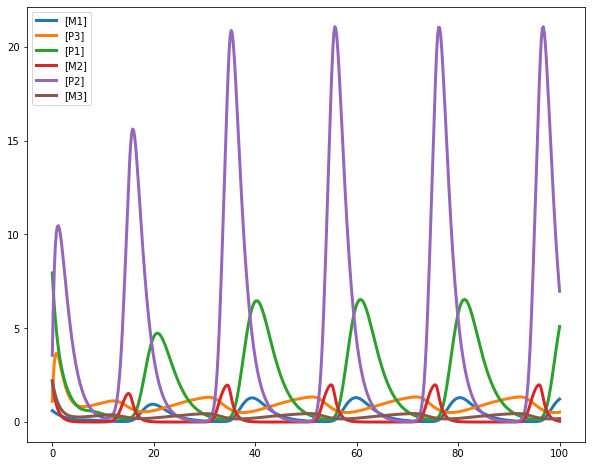

In [6]:
repressilator_str = """
# Compartments and Species:
species M1, P3, P1, M2, P2, M3;

# Reactions:
J0:  -> M1; a_m1*(Kr_P3^n1/(Kr_P3^n1 + P3^n1)) + leak1;
J1: M1 -> ; d_m1*M1;
J2:  -> P1; a_p1*M1;
J3: P1 -> ; d_p1*P1;
J4:  -> M2; a_m2*(Kr_P1^n2/(Kr_P1^n2 + P1^n2)) + leak2;
J5: M2 -> ; d_m2*M2;
J6:  -> P2; a_p2*M2;
J7: P2 -> ; d_p2*P2;
J8:  -> M3; a_m3*(Kr_P2^n3/(Kr_P2^n3 + P2^n3)) + leak3;
J9: M3 -> ; d_m3*M3;
J10:  -> P3; a_p3*M3;
J11: P3 -> ; d_p3*P3;

# Species initializations:
M1 = 0.604016261711246;
P3 = 1.10433330559171;
P1 = 7.94746428021418;
M2 = 2.16464969760648;
P2 = 3.55413750091507;
M3 = 2.20471854765531;

# Variable initializations:
a_m1 = 1.13504504342841;
Kr_P3 = 0.537411795656332;
n1 = 7.75907326833983;
leak1 = 2.59839004225795e-07;
d_m1 = 0.360168301619141;
a_p1 = 5.91755684808254;
d_p1 = 1.11075218613419;
a_m2 = 2.57306185467814;
Kr_P1 = 0.190085253528206;
n2 = 6.89140262856765;
leak2 = 1.51282707494481e-06;
d_m2 = 1.05773721506759;
a_p2 = 8.35628834784826;
d_p2 = 0.520562081730298;
a_m3 = 0.417889543691157;
Kr_P2 = 2.71031378955001;
n3 = 0.44365980532785;
leak3 = 3.63586125130783e-11;
d_m3 = 0.805873530762994;
a_p3 = 4.61276807677109;
d_p3 = 1.54954108126666;

"""

repressilator = te.loada(repressilator_str)
repressilator.simulate(0, 100, 500)
repressilator.plot(figsize = (10, 8), linewidth = 3)

## Simulating a complex model of a true biological system

Using the model describe in Chapter X, we will demonstrate both deterministic and stochastic simulation studies.

In [7]:
antimony_str = """
model sars_cov2_infection

// Define model equations
production_genomic_ssRNA:               -> gen_ssRNA;   k1*rep_ssRNA
transcription_genomic_ssRNA:  gen_ssRNA -> rep_ssRNA;   k2*gen_ssRNA
translation_of_viral_envelope:          -> envelope;    k3*rep_ssRNA
degradation_of_ssRNA:         rep_ssRNA -> ;            k4*rep_ssRNA
degradation_of_envelope:       envelope -> ;            k5*envelope
formation_of_free_virus_complex: gen_ssRNA + envelope -> virus_free;  k6*gen_ssRNA*envelope
binding_of_virus_complex_to_host:  virus_free + $ACE2 -> virus_bound; k7*virus_free*ACE2

// Annotate reactions
transcription_genomic_ssRNA.sboTerm = SBO:0000183
translation_of_viral_envelope.sboTerm = SBO:0000184

// Set global constants
k1 = 0.968; k2 = 0.025;
k3 = 1000; k4 = 0.222
k5 = 2; k6 = 7.5E-6
k7 = 0.112 

// Annotate kinetic constant distribution information
# k1.confidenceInterval = {0.883, 0.892}
# k4.confidenceInterval = {0.184, 0.186}

// Set initial conditions
rep_ssRNA = 1; gen_ssRNA = 0;
envelope = 0; ACE2 = 100;
virus_free = 0; virus_bound = 0;

end
"""

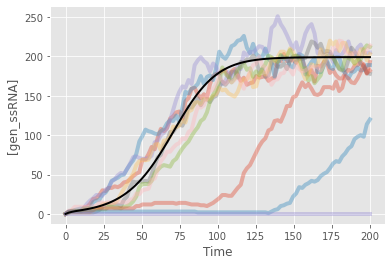


Timeseries of gen_ssRNA using fitted values for k1 and k4, and curated data for k7:
       time, gen_ssRNA
 [[       0,         0],
  [  2.0202,   1.55461],
  [  4.0404,   2.58539],
  [ 6.06061,   3.36224],
  [ 8.08081,   4.03135],
  [  10.101,   4.67416],
  [ 12.1212,   5.33803],
  [ 14.1414,   6.05248],
  [ 16.1616,   6.83787],
  [ 18.1818,   7.71011],
  [  20.202,   8.68312],
  [ 22.2222,   9.77029],
  [ 24.2424,   10.9851],
  [ 26.2626,   12.3416],
  [ 28.2828,   13.8547],
  [  30.303,   15.5398],
  [ 32.3232,   17.4132],
  [ 34.3434,   19.4919],
  [ 36.3636,   21.7933],
  [ 38.3838,   24.3349],
  [  40.404,   27.1339],
  [ 42.4242,   30.2071],
  [ 44.4444,   33.5698],
  [ 46.4646,   37.2357],
  [ 48.4848,   41.2158],
  [ 50.5051,   45.5176],
  [ 52.5253,   50.1446],
  [ 54.5455,   55.0948],
  [ 56.5657,   60.3608],
  [ 58.5859,   65.9279],
  [ 60.6061,   71.7748],
  [ 62.6263,   77.8724],
  [ 64.6465,   84.1841],
  [ 66.6667,   90.6665],
  [ 68.6869,   97.2698],
  [ 70.7071,   10

In [8]:
import tellurium as te
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Load the model string into a RoadRunner object instance
model = te.loada(antimony_str)

# Generate deterministic results using CVODE
det_results = model.simulate (0, 200, 100, ['time', 'gen_ssRNA'])

# Set a seed value for reproducible stochastic output
model.seed = 124

plt.figure(2)
for i in range(10):
    # Reset variable concentrations to initial conditions
    model.reset()
    # Generate stochastic results using Gillespie's algorithm
    stoch_results = model.gillespie (0, 200, 100, ['time', 'gen_ssRNA'])
    # Plot stochastic simulation trajectory
    plt.plot(stoch_results['time'], stoch_results['gen_ssRNA'], linewidth=4, alpha=0.4)

# Plot deterministic results
plt.plot(det_results['time'], det_results['gen_ssRNA'], color='black', linewidth=2,)
plt.xlabel('Time')
plt.ylabel('[gen_ssRNA]')

# Save figure for Docker implementation and show
# plt.savefig('curated_k7_sars_cov2_infection_simulation.jpg', dpi = 300)
plt.show()

print(f'\nTimeseries of gen_ssRNA using fitted values for k1 and k4, and curated data for k7:')
print(det_results)


<br>
<html>
   <head>
      <title>Bibliography</title>
   </head>
   <body>
      <h1>Bibliography</h1>
      <ol>
         <li>
            <p>K. Choi et al., <cite>Tellurium: An extensible python-based modeling environment for systems and synthetic biology</cite>, Biosystems, vol. 171, pp. 74–79, Sep. 2018.</p>
         </li>
         <li>
            <p>E. T. Somogyi et al., <cite>libRoadRunner: a high performance SBML simulation and analysis library.,</cite>, Bioinformatics, vol. 31, no. 20, pp. 3315–21, Oct. 2015.</p>         
          <li>
            <p>L. P. Smith, F. T. Bergmann, D. Chandran, and H. M. Sauro, <cite>Antimony: a modular model definition language</cite>, Bioinformatics, vol. 25, no. 18, pp. 2452–2454, Sep. 2009.</p>
         </li>
         <li>
            <p>K. Choi, L. P. Smith, J. K. Medley, and H. M. Sauro, <cite>phraSED-ML: a paraphrased, human-readable adaptation of SED-ML</cite>, J. Bioinform. Comput. Biol., vol. 14, no. 06, Dec. 2016.</p>
         </li>
         <li>
            <p>J. Wolf, H. Y. Sohn, R. Heinrich, and H. Kuriyama, <cite>Mathematical analysis of a mechanism for autonomous metabolic oscillations in continuous culture of Saccharomyces cerevisiae</cite>, FEBS Lett., vol. 499, no. 3, pp. 230–234, Jun. 2001.</p>
         </li>
      </ol>
   </body>
</html>